## Using random forests to predict wine quality from Kaggle's wine dataset


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#NB referencing this article as inspiration for some of the code below https://www.analyticsvidhya.com/blog/2021/04/wine-quality-prediction-using-machine-learning/

In [4]:
#https://www.kaggle.com/datasets/rajyellow46/wine-quality/
df = pd.read_csv('winequalityN.csv')

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df.shape


(6497, 13)

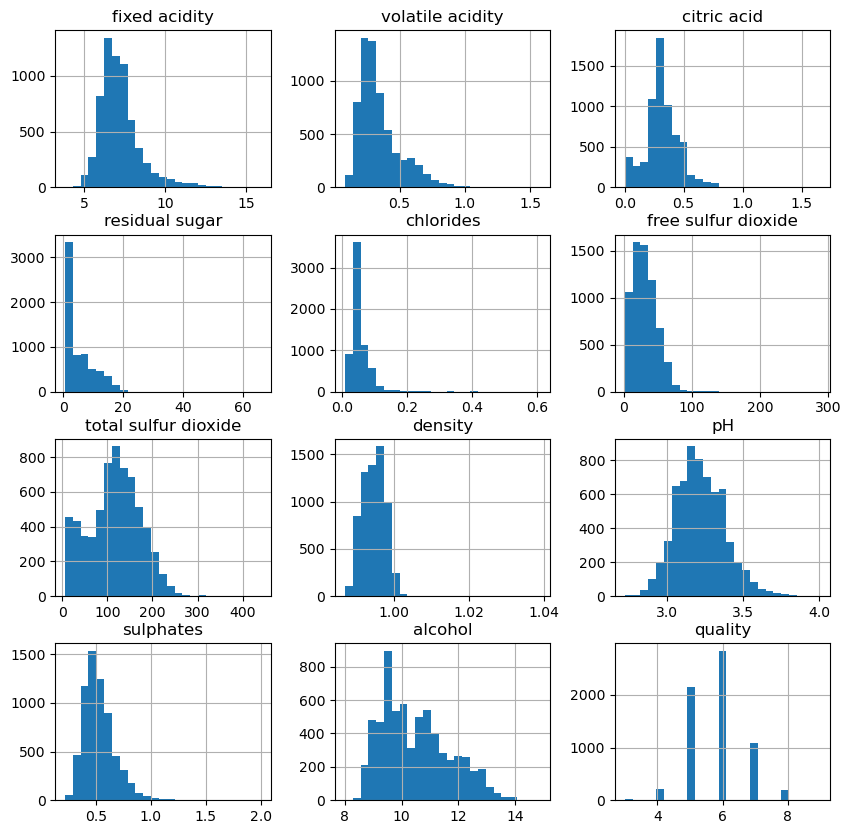

In [9]:
df.hist(bins=25, figsize=(10,10));

Text(0, 0.5, 'alcohol')

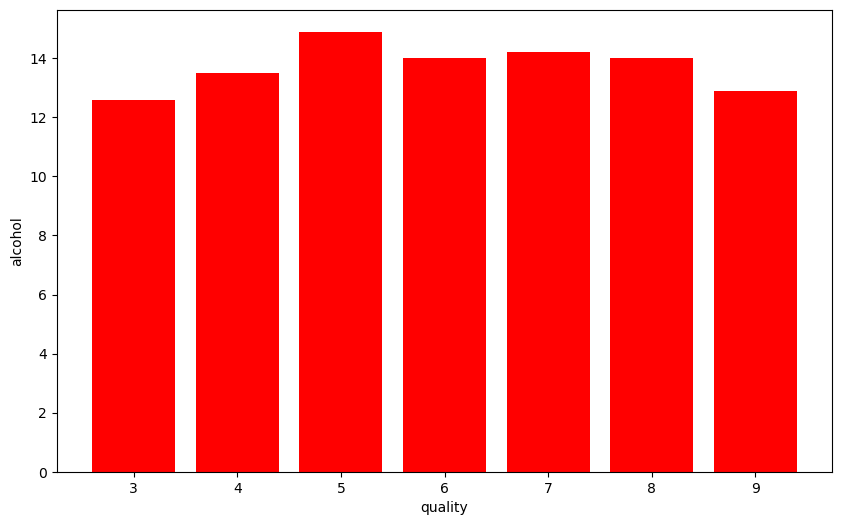

In [10]:
plt.figure(figsize=[10,6])
plt.bar(df['quality'], df['alcohol'], color ='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

<AxesSubplot:>

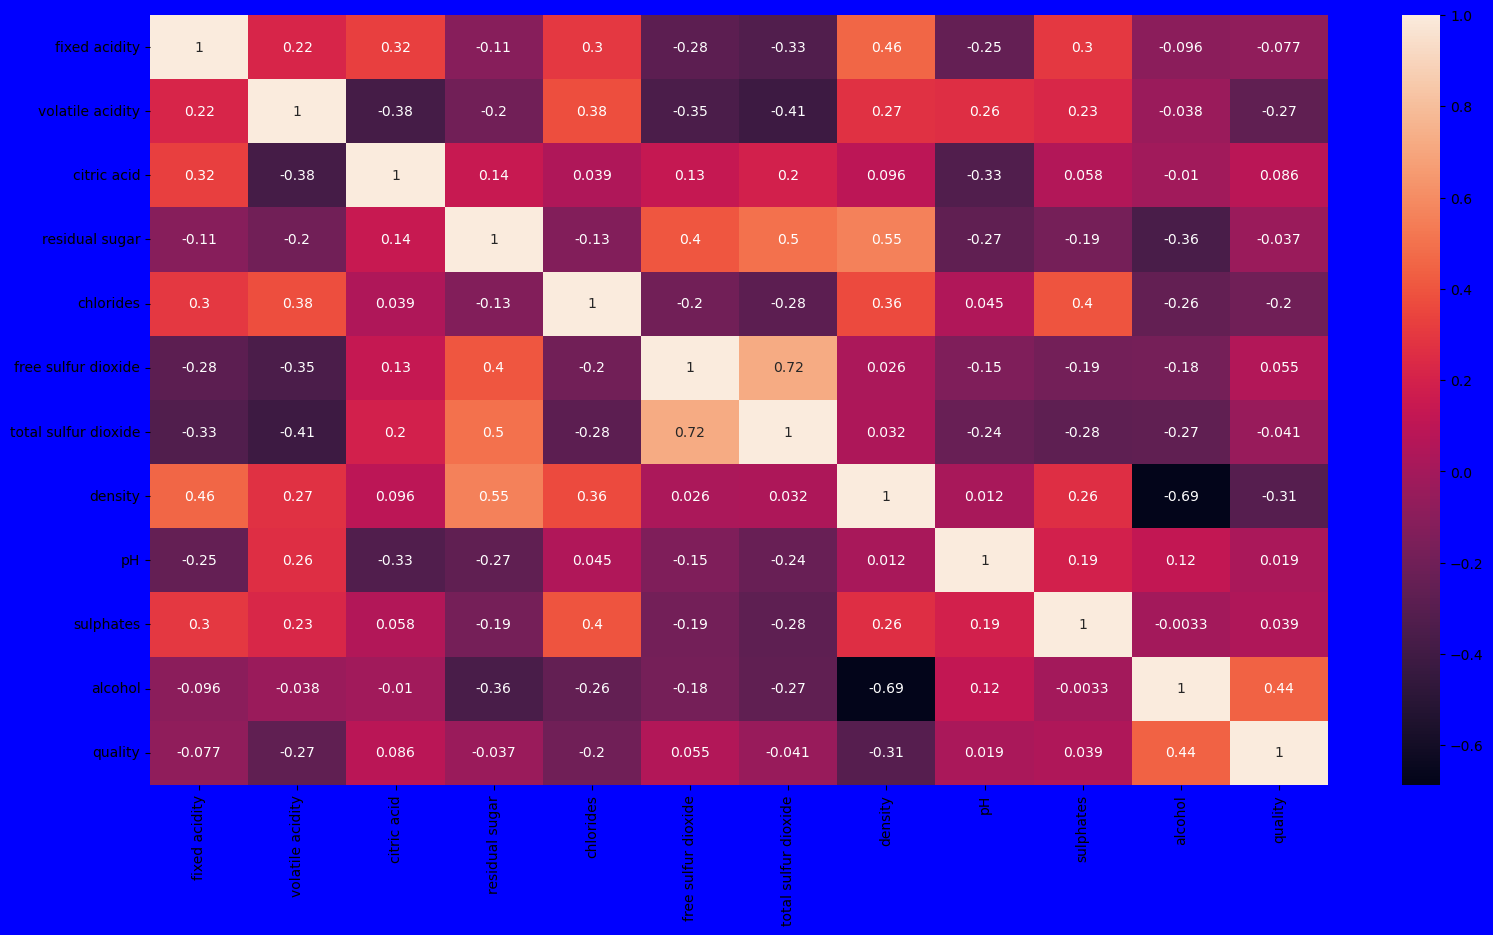

In [11]:
plt.figure(figsize=[19,10], facecolor='blue')
sb.heatmap(df.corr(), annot=True)

In [13]:
# Handle missing values by filling them with the median of each column
data_filled = df.fillna(df.median())

# Convert 'type' from categorical to numerical if it's not already numeric
if data_filled['type'].dtype == 'object':
    data_filled['type'] = pd.get_dummies(data_filled['type'], drop_first=True)

data_filled

/var/folders/2x/dbnt23xd6xv5bzc9snn0s0tm0000gn/T/ipykernel_87871/3675658794.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_filled = df.fillna(df.median())


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Running the RF model

In [15]:
# Splitting the dataset into features (X) and target variable (y)
X_filled = data_filled.drop('quality', axis=1)
y_filled = data_filled['quality']

# Splitting the dataset into training and testing sets
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(
    X_filled, y_filled, test_size=0.2, random_state=42
)

# Create and train the Random Forest model
rf_model_filled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_filled.fit(X_train_filled, y_train_filled)

# Predicting on the test set
y_pred_filled = rf_model_filled.predict(X_test_filled)

# Calculating performance metrics
mse_filled = mean_squared_error(y_test_filled, y_pred_filled)
r2_filled = r2_score(y_test_filled, y_pred_filled)

# Print the results
print("Mean Squared Error (MSE):", mse_filled)
print("R-squared (R²) Score:", r2_filled)


Mean Squared Error (MSE): 0.31526676923076924
R-squared (R²) Score: 0.5589437182277313


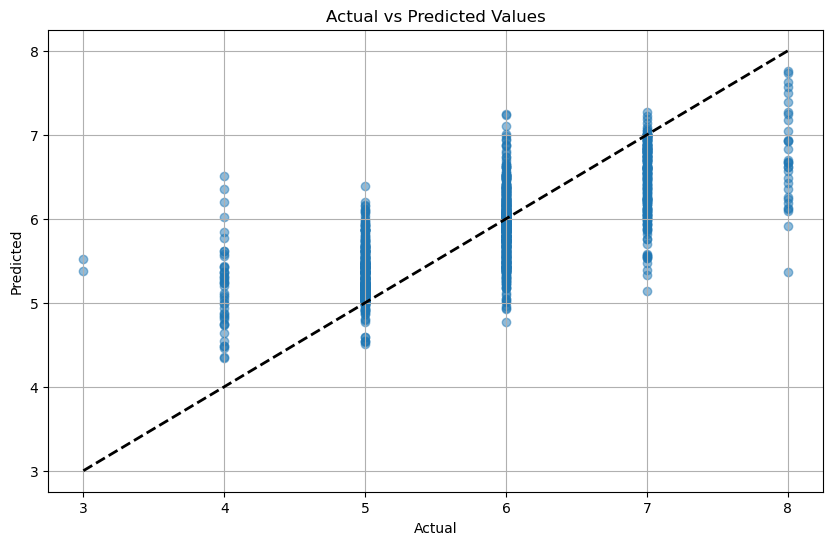

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_filled, y_pred_filled, alpha=0.5)
plt.plot([y_test_filled.min(), y_test_filled.max()], [y_test_filled.min(), y_test_filled.max()], 'k--', lw=2) # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)

# Show plot
plt.show()


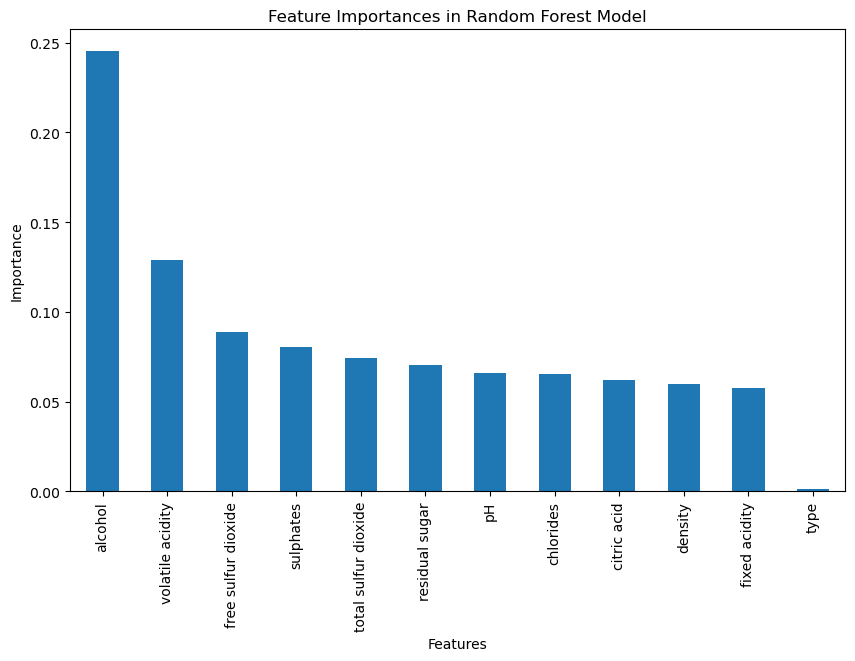

In [17]:
# Retrieving feature importance from the Random Forest model
feature_importances = rf_model_filled.feature_importances_

# Creating a pandas series to visualize the importances
feature_importance_series = pd.Series(feature_importances, index=X_filled.columns)

# Sorting the feature importances for better visualization
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


In [57]:
## Running the RF model on new, live data

data_filled.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [58]:
#Taking a sample of the dataset and running the model on it, only taking the inputs, hence the -1
new_data = data_filled.iloc[1:2, :-1]

In [59]:
new_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5


In [60]:
new_predictions = rf_model_filled.predict(new_data)

In [61]:
new_predictions

array([5.74])